### K-Means image compression

(735, 980, 3)


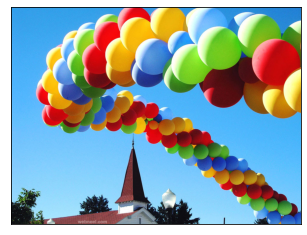

In [93]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib
from mpl_toolkits import mplot3d
from PIL import Image
img= mpimg.imread("baloon.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img)
print(img.shape)

# img =  mpimg.imread('baloon.jpg')
# ax = plt.axes(xticks=[], yticks=[])
# ax.imshow(img)
# print(img.shape)

In [94]:
img.shape

(735, 980, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1:

In [95]:
data = img / 255.0 # use 0...1 scale
data = data.reshape(735 * 980, 3)
data.shape

(720300, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [96]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=30)

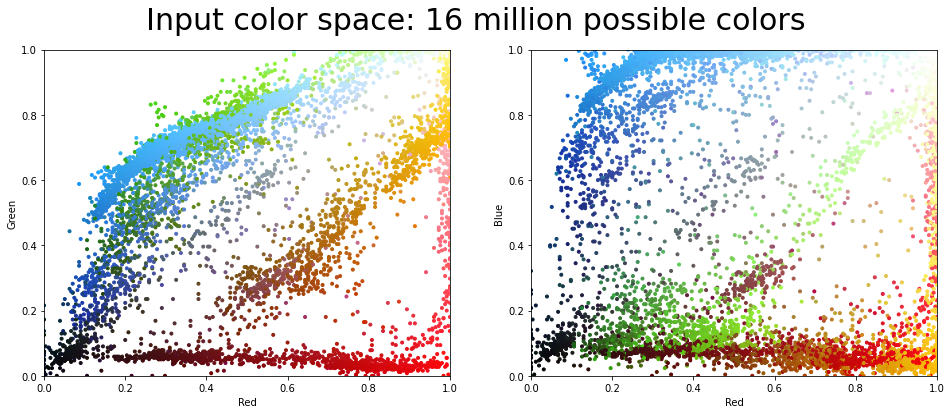

In [97]:
plot_pixels(data, title='Input color space: 16 million possible colors')

reducing 16 mill color to 10 color to see the color compression using a k-means clustering across the pixel space. 

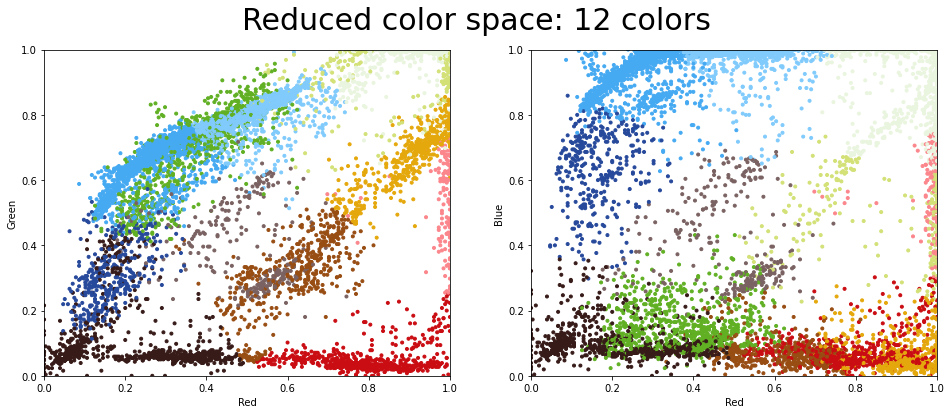

In [98]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters = 12, max_iter=100)
kmeans.fit(data)
new_colors = np.asarray(kmeans.cluster_centers_[kmeans.predict(data)])

plot_pixels(data, colors=new_colors,title="Reduced color space: 12 colors")

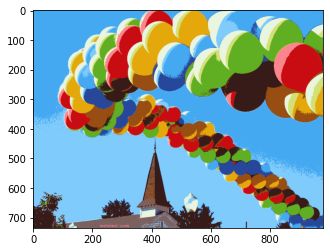

In [99]:
new_img = new_colors.reshape(img.shape)



# from PIL import Image
# import numpy as np
# array_new_img = np.asarray( new_img ) 
# im = Image.fromarray((array_new_img).astype(np.uint8))
# im.save("compressed_quadtree_image.jpg")
plt.imshow(new_img)
plt.imsave('compressed_k-means-12colors.jpg', new_img)

# fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[], yticks=[]))

# fig = plt.figure(figsize=(3, 6))
# plt.imshow(new_img) #plot example
# plt.show() #for control
# fig.savefig('temp.jpg')

# ax[0].imshow(img)
# ax[0].set_title('Original Image', size=16)

# ax[1].imshow(new_img)
# ax[1].set_title('15-color Image', size=16)
# fig.savefig("new_colored_birds")

 # Save the subplot.
# bbox = ax[1].get_tightbbox(f.canvas.get_renderer())
# f.savefig("subplot{}.png".format(1),bbox_inches=bbox.transformed(f.dpi_scale_trans.inverted()))

In [100]:
#fig.savefig("new_colored_birds")